In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [2]:
customer_data = pd.read_csv("/content/Mall_Customers.csv")

In [3]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
# Encode 'Gender' column
customer_data['Gender'] = customer_data['Gender'].map({'Male': 0, 'Female': 1})

In [6]:
#Standardization
#Standardize the features to ensure they have a mean of 0 and a standard deviation of 1.
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

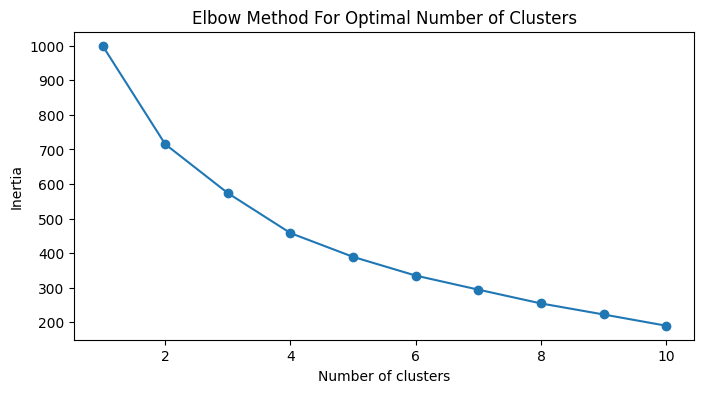

In [7]:
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the elbow method
import matplotlib.pyplot as plt

inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()

In [8]:
# Based on the Elbow Method, let's choose k=5
k = 5

# Apply k-means clustering with the chosen k
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(scaled_data)
customer_data['Cluster'] = kmeans.predict(scaled_data)
print(customer_data[['CustomerID', 'Cluster']])

     CustomerID  Cluster
0             1        4
1             2        4
2             3        4
3             4        4
4             5        4
..          ...      ...
195         196        0
196         197        3
197         198        0
198         199        3
199         200        0

[200 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


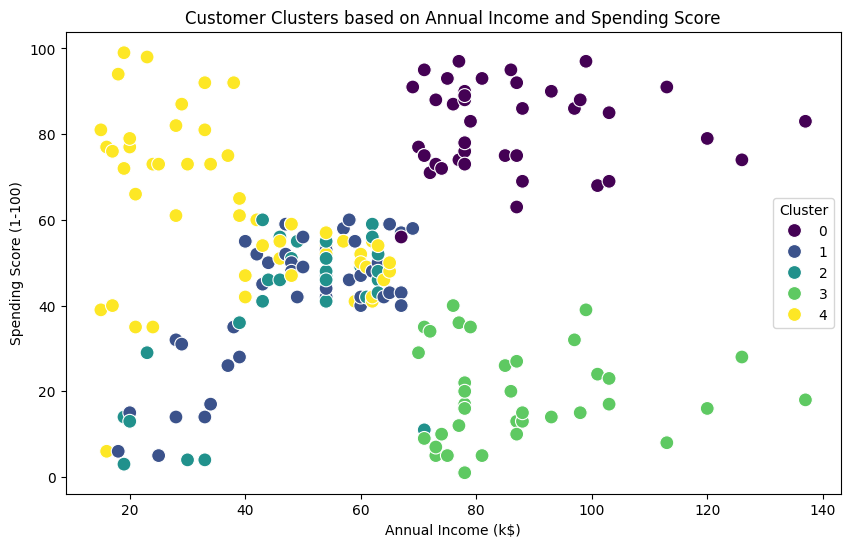

In [9]:
# Visualize the clusters
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis', s=100)
plt.title('Customer Clusters based on Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

In [10]:
# Visualize cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=customer_data.columns[:-1])  # Exclude 'Cluster' column
print("Cluster centers:")
print(cluster_centers_df)

Cluster centers:
   CustomerID    Gender        Age  Annual Income (k$)  Spending Score (1-100)
0  160.975000  0.525000  32.550000           86.050000               81.475000
1   71.634146  1.000000  49.463415           48.780488               41.658537
2   70.275862  0.000000  56.724138           48.068966               39.724138
3  162.891892  0.486486  39.891892           87.432432               18.837838
4   50.169811  0.603774  24.886792           38.509434               60.830189


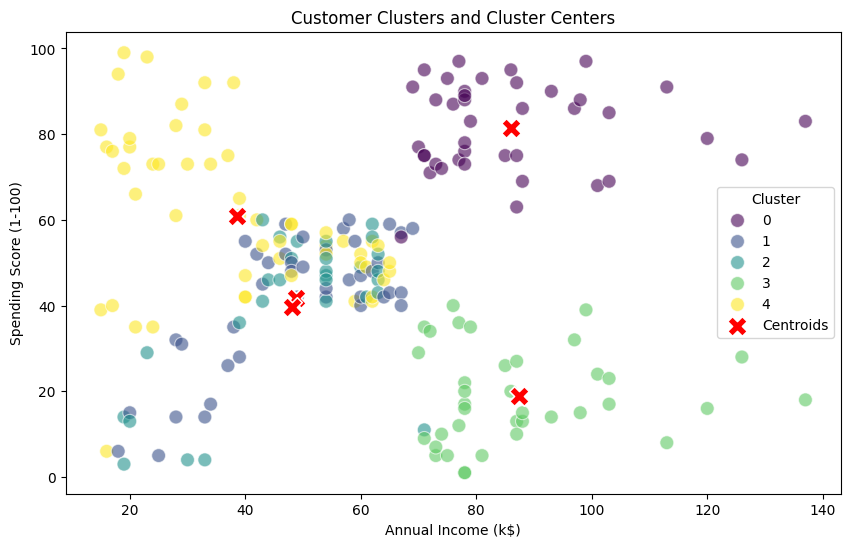

In [11]:
# Scatter plot of cluster centers
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis', s=100, alpha=0.6)
sns.scatterplot(data=cluster_centers_df, x='Annual Income (k$)', y='Spending Score (1-100)', s=200, color='red', marker='X', label='Centroids')
plt.title('Customer Clusters and Cluster Centers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()